In [1]:
# google colab で実行する場合は以下のコメントアウトを外す
# ! wget https://github.com/KHiraGit/sudspg_ds/raw/main/ds09_icecream.xlsx
# ! pip install pmdarima

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import statsmodels.api as sm

In [3]:
# アイスクリームの売上データ 
# https://www.icecream.or.jp/iceworld/data/expenditures.html
icecream_df = pd.read_excel('ds09_icecream.xlsx', index_col=0)

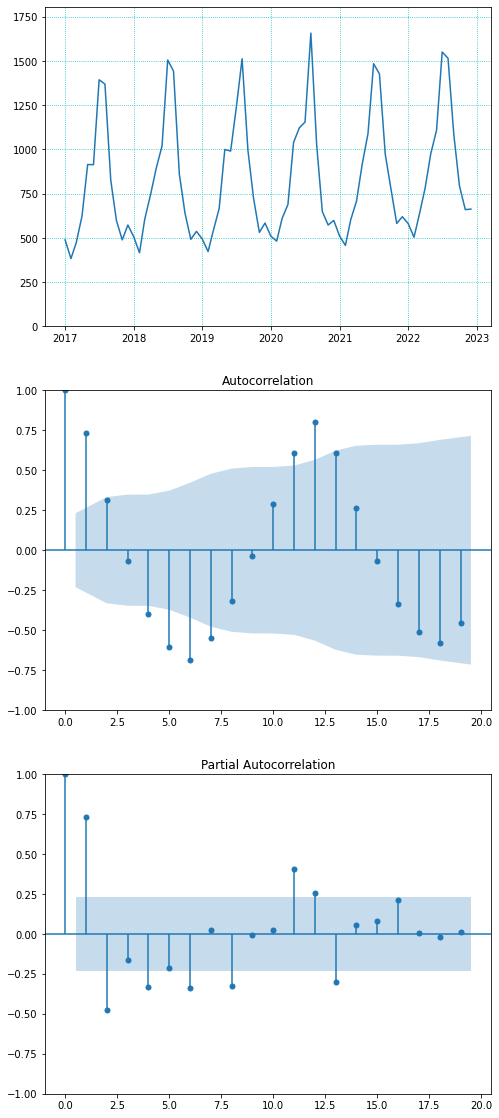

In [4]:
# アイスクリーム売上のグラフを表示
fig = plt.figure(figsize=(8, 20))  
ax = fig.add_subplot(311)
ax.plot(icecream_df)
y_min, y_max = ax.get_ylim()
ax.set_ylim(0, y_max * 1.05)
ax.grid(axis='both',linestyle='dotted', color='c')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y")) 

# 自己相関係数と偏自己相関係数のグラフを表示
ax1 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_acf(icecream_df, ax=ax1)
ax2 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(icecream_df, ax=ax2, method='ywm')

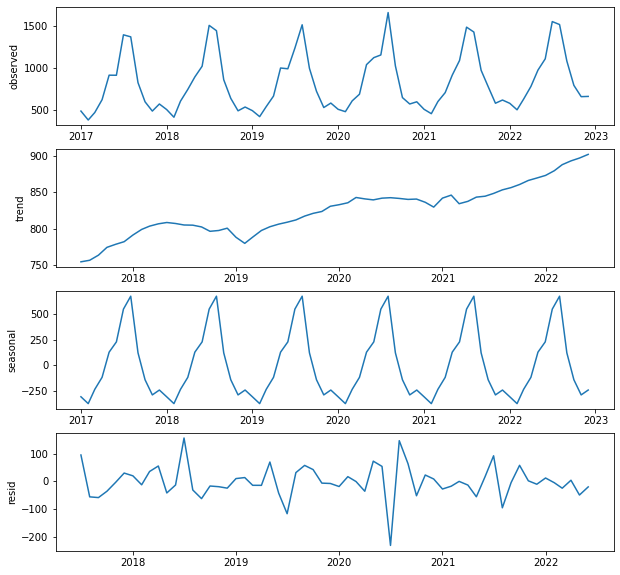

In [5]:
# 時系列データをトレンド、規則的変動成分、不規則変動成分に分解
res = sm.tsa.seasonal_decompose(icecream_df, period=12)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(411)
ax1.set_ylabel('observed')
ax1.plot(res.observed)
ax2 = fig.add_subplot(412)
ax2.set_ylabel('trend')
ax2.plot(res.trend)
ax3 = fig.add_subplot(413)
ax3.set_ylabel('seasonal')
ax3.plot(res.seasonal)
ax4 = fig.add_subplot(414)
ax4.set_ylabel('resid')
ax4.plot(res.resid)


In [6]:
# モデル構築と検証のためのデータを準備
train = icecream_df[0:60]  # 学習用データ 2021年まで
test = icecream_df[60:]  # 検証用データ 2022年分

In [7]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train, seasonal=True, trace=True, m=12, stepwise=True)                         
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=568.165, Time=0.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=577.809, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=575.012, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=578.501, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=571.710, Time=0.41 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=577.721, Time=0.23 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(2,0,2)(2,1,0)[12] intercept   : AIC=573.178, Time=1.08 sec
 ARIMA(2,0,2)(2,1,2)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=581.250, Time=0.24 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=567.007, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   60
Model:             SARIMAX(3, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -275.696
Date:                              Mon, 12 Jun 2023   AIC                            565.393
Time:                                      08:49:47   BIC                            578.491
Sample:                                           0   HQIC                           570.343
                                               - 60                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     25.0486     18.299      1.369      0.171     -10.817      60.915
ar.L1         -0.1643      0.167     -0.983      0.326      -0.492       0.163
ar.L2         -0.2663      0.217     -1.227      0.220      -0.692       0.159
ar.L3          0.2092      0.208      1.006      0.314      -0.198       0.617
ar.S.L12       0.1121      0.439      0.255      0.799      -0.749       0.973
ma.S.L12      -0.8680      1.308     -0.664      0.507      -3.432       1.696
sigma2      4387.5766   4247.893      1.033      0.302   -3938.141    1.27e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                10.22
Prob(Q):                              0.91   Prob(JB):                         0.01
Heteroskedasticity (H):               0.99   Skew:                            -0.72
Prob(H) (two-sided):                  0.99   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

e:\sudspg\su_dspg_ds\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
e:\sudspg\su_dspg_ds\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


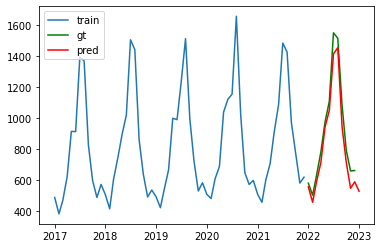

In [9]:
train.index = pd.DatetimeIndex(train.index.values, freq=train.index.inferred_freq)
SARIMA = sm.tsa.SARIMAX(train.earning, order=(0, 0, 0), seasonal_order=(2, 1, 0, 12)).fit()
pred = SARIMA.predict('2022-01-01', '2023-01-01')
# 実データと予測結果の図示
plt.plot(train.earning, label="train")
plt.plot(test.earning, "g", label="gt")
plt.plot(pred, "r", label="pred")
plt.legend()